# Logistic Regression (Classification)

## 1. Data Pre-processing step:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('housepricedata.csv')

In [3]:
dataset.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450.0,7.0,5.0,856.0,2.0,1.0,3.0,8.0,0.0,548.0,1
1,9600.0,6.0,8.0,1262.0,2.0,0.0,3.0,6.0,1.0,460.0,1
2,11250.0,7.0,5.0,920.0,2.0,1.0,3.0,6.0,1.0,608.0,1
3,9550.0,7.0,5.0,756.0,1.0,0.0,3.0,7.0,1.0,642.0,0
4,14260.0,8.0,5.0,1145.0,2.0,1.0,4.0,9.0,1.0,836.0,1


In [4]:
dataset.shape

(1460, 11)

In [5]:
dataset.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1460 non-null   float64
 1   OverallQual       1460 non-null   float64
 2   OverallCond       1460 non-null   float64
 3   TotalBsmtSF       1460 non-null   float64
 4   FullBath          1460 non-null   float64
 5   HalfBath          1460 non-null   float64
 6   BedroomAbvGr      1460 non-null   float64
 7   TotRmsAbvGrd      1460 non-null   float64
 8   Fireplaces        1460 non-null   float64
 9   GarageArea        1460 non-null   float64
 10  AboveMedianPrice  1460 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 125.6 KB


In [7]:
dataset

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450.0,7.0,5.0,856.0,2.0,1.0,3.0,8.0,0.0,548.0,1
1,9600.0,6.0,8.0,1262.0,2.0,0.0,3.0,6.0,1.0,460.0,1
2,11250.0,7.0,5.0,920.0,2.0,1.0,3.0,6.0,1.0,608.0,1
3,9550.0,7.0,5.0,756.0,1.0,0.0,3.0,7.0,1.0,642.0,0
4,14260.0,8.0,5.0,1145.0,2.0,1.0,4.0,9.0,1.0,836.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917.0,6.0,5.0,953.0,2.0,1.0,3.0,7.0,1.0,460.0,1
1456,13175.0,6.0,6.0,1542.0,2.0,0.0,3.0,7.0,2.0,500.0,1
1457,9042.0,7.0,9.0,1152.0,2.0,0.0,4.0,9.0,2.0,252.0,1
1458,9717.0,5.0,6.0,1078.0,1.0,0.0,2.0,5.0,0.0,240.0,0


## Extract the Dependent and Independent Variables

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[   5.,  856.],
       [   8., 1262.],
       [   5.,  920.],
       ...,
       [   9., 1152.],
       [   6., 1078.],
       [   6., 1256.]])

In [10]:
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train)

[[   4.  994.]
 [   5.  384.]
 [   9.  648.]
 ...
 [   5.    0.]
 [   5. 1374.]
 [   5. 1195.]]


In [13]:
print(X_test)

[[3.000e+00 2.035e+03]
 [7.000e+00 8.060e+02]
 [4.000e+00 7.090e+02]
 [5.000e+00 1.160e+03]
 [5.000e+00 5.250e+02]
 [4.000e+00 1.022e+03]
 [5.000e+00 1.485e+03]
 [6.000e+00 7.800e+02]
 [5.000e+00 2.396e+03]
 [5.000e+00 5.510e+02]
 [5.000e+00 1.352e+03]
 [6.000e+00 1.680e+03]
 [5.000e+00 9.780e+02]
 [5.000e+00 8.640e+02]
 [5.000e+00 1.082e+03]
 [6.000e+00 1.314e+03]
 [5.000e+00 7.500e+02]
 [5.000e+00 9.900e+02]
 [6.000e+00 1.228e+03]
 [8.000e+00 9.100e+02]
 [4.000e+00 9.100e+02]
 [5.000e+00 8.480e+02]
 [5.000e+00 8.160e+02]
 [5.000e+00 7.020e+02]
 [6.000e+00 9.010e+02]
 [9.000e+00 9.160e+02]
 [5.000e+00 7.560e+02]
 [6.000e+00 6.300e+02]
 [5.000e+00 1.698e+03]
 [5.000e+00 8.320e+02]
 [5.000e+00 1.584e+03]
 [5.000e+00 7.400e+02]
 [6.000e+00 8.880e+02]
 [5.000e+00 1.145e+03]
 [5.000e+00 2.046e+03]
 [5.000e+00 7.290e+02]
 [5.000e+00 1.561e+03]
 [5.000e+00 8.820e+02]
 [5.000e+00 9.120e+02]
 [5.000e+00 1.463e+03]
 [7.000e+00 1.202e+03]
 [5.000e+00 3.840e+02]
 [5.000e+00 1.310e+03]
 [5.000e+00

In [14]:
print(y_train)

[0 0 0 ... 0 1 1]


In [15]:
print(y_test)

[1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0]


## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(dataset)

      LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0      8450.0          7.0          5.0        856.0       2.0       1.0   
1      9600.0          6.0          8.0       1262.0       2.0       0.0   
2     11250.0          7.0          5.0        920.0       2.0       1.0   
3      9550.0          7.0          5.0        756.0       1.0       0.0   
4     14260.0          8.0          5.0       1145.0       2.0       1.0   
...       ...          ...          ...          ...       ...       ...   
1455   7917.0          6.0          5.0        953.0       2.0       1.0   
1456  13175.0          6.0          6.0       1542.0       2.0       0.0   
1457   9042.0          7.0          9.0       1152.0       2.0       0.0   
1458   9717.0          5.0          6.0       1078.0       1.0       0.0   
1459   9937.0          5.0          6.0       1256.0       1.0       1.0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0         

In [18]:
X_train

array([[-1.4066467 , -0.15048727],
       [-0.50957149, -1.6350458 ],
       [ 3.07872935, -0.99254834],
       ...,
       [-0.50957149, -2.56958757],
       [-0.50957149,  0.77431968],
       [-0.50957149,  0.33868693]])

In [19]:
X_test

array([[-2.30372191e+00,  2.38299704e+00],
       [ 1.28457893e+00, -6.08023345e-01],
       [-1.40664670e+00, -8.44092488e-01],
       [-5.09571488e-01,  2.53507344e-01],
       [-5.09571488e-01, -1.29189375e+00],
       [-1.40664670e+00, -8.23436021e-02],
       [-5.09571488e-01,  1.04446066e+00],
       [ 3.87503720e-01, -6.71299610e-01],
       [-5.09571488e-01,  3.26156365e+00],
       [-5.09571488e-01, -1.22861749e+00],
       [-5.09571488e-01,  7.20778227e-01],
       [ 3.87503720e-01,  1.51903265e+00],
       [-5.09571488e-01, -1.89426513e-01],
       [-5.09571488e-01, -4.66868599e-01],
       [-5.09571488e-01,  6.36785485e-02],
       [ 3.87503720e-01,  6.28297531e-01],
       [-5.09571488e-01, -7.44310685e-01],
       [-5.09571488e-01, -1.60222083e-01],
       [ 3.87503720e-01,  4.18999115e-01],
       [ 2.18165414e+00, -3.54918283e-01],
       [-1.40664670e+00, -3.54918283e-01],
       [-5.09571488e-01, -5.05807839e-01],
       [-5.09571488e-01, -5.83686320e-01],
       [-5.

## 2. Fitting Logistic Regression to the Training set

In [20]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## 3. Predicting the Test Result

In [21]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [22]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

## 4. Test Accuracy of the result

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[140,  39],
       [ 62, 124]], dtype=int64)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7232876712328767


## 5. Visualizing the training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


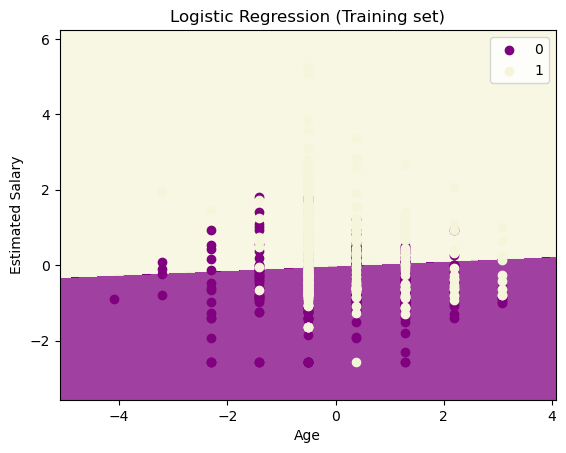

In [27]:
#Visualizing the training set result
#ListedColormap class help us to colorize the data points.
from matplotlib.colors import ListedColormap

#Create local variables X_set and y_set. Because we use these #variables again in the test set
X_set, y_set = X_train, y_train

#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('purple', 'beige')))

#plot the limits of the age and the estimated salary lines.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#This loop here plots all the data points that are the real values.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'beige'))(i), label = j)

    #Add the name of the plot and the labels.
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 6. Visualizing the test set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


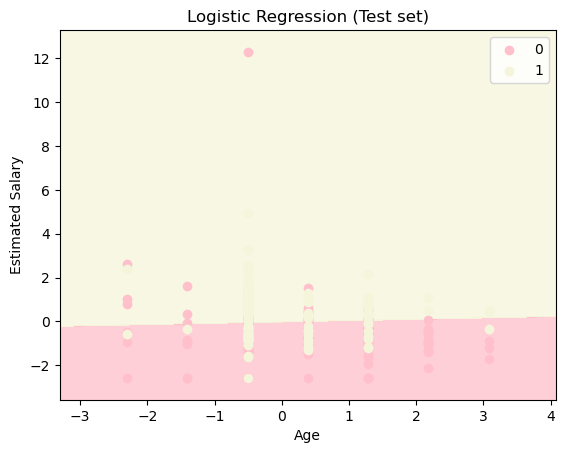

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'beige')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'beige'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## FINISH